# Imports

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [107]:
data = pd.read_csv("CO2 Emissions_Canada.csv")
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


# Features & Output
- Engine Size (L)
- cylinders
- Fuel Consumption City (L/100 km)
- Fuel Consumption Hwy (L/100 km)
- Fuel Consumption Comb (L/100 km)

In [108]:
x1 = np.array(data["Engine Size(L)"])
x2 = np.array(data["Fuel Consumption City (L/100 km)"])
x3 = np.array(data["Fuel Consumption Hwy (L/100 km)"])
x4 = np.array(data["Fuel Consumption Comb (L/100 km)"])
y = np.array(data["CO2 Emissions(g/km)"])
print(f"x's ->\n\n{x1}\n{x2}\n{x3}\n{x4}\n", end="\n")
print(f"y ->\n\n{y}")

x's ->

[2.  2.4 1.5 ... 2.  2.  2. ]
[ 9.9 11.2  6.  ... 11.7 11.2 12.2]
[6.7 7.7 5.8 ... 8.6 8.3 8.7]
[ 8.5  9.6  5.9 ... 10.3  9.9 10.7]

y ->

[196 221 136 ... 240 232 248]


# Normalize Data

In [109]:
def normalize(X):   
    result = []     
    maximum = max(X)
    for item in X:
        result.append(round(item/maximum, 2))
    return result

x1_normalized = np.array(normalize(x1))
x2_normalized = np.array(normalize(x2))
x3_normalized = np.array(normalize(x3))
x4_normalized = np.array(normalize(x4))
y_normalized = np.array(normalize(y))

print(f"x's ->\n\n{x1_normalized}\n{x2_normalized}\n{x3_normalized}\n{x4_normalized}\n{y_normalized}")

x's ->

[0.24 0.29 0.18 ... 0.24 0.24 0.24]
[0.32 0.37 0.2  ... 0.38 0.37 0.4 ]
[0.33 0.37 0.28 ... 0.42 0.4  0.42]
[0.33 0.37 0.23 ... 0.39 0.38 0.41]
[0.38 0.42 0.26 ... 0.46 0.44 0.48]


# Plot Normalized Data

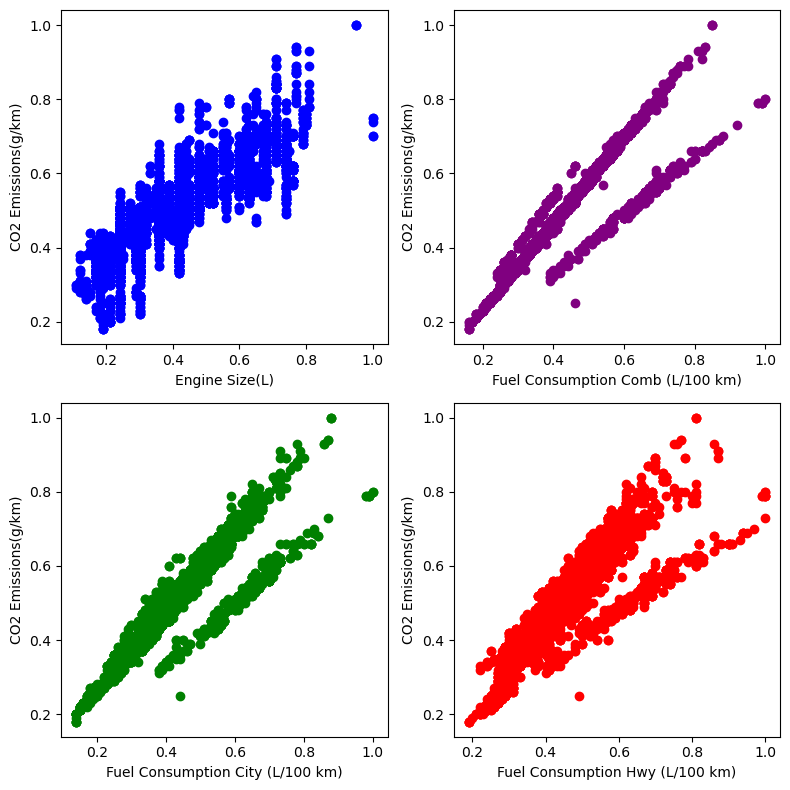

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].set_xlabel("Engine Size(L)")
axs[0, 0].set_ylabel("CO2 Emissions(g/km)")
axs[0, 0].plot(x1_normalized, y_normalized, "o", color="blue")

axs[1, 0].set_xlabel("Fuel Consumption City (L/100 km)")
axs[1, 0].set_ylabel("CO2 Emissions(g/km)")
axs[1, 0].plot(x2_normalized, y_normalized, "o", color="green")

axs[1, 1].set_xlabel("Fuel Consumption Hwy (L/100 km)")
axs[1, 1].set_ylabel("CO2 Emissions(g/km)")
axs[1, 1].plot(x3_normalized, y_normalized, "o", color="red")

axs[0, 1].set_xlabel("Fuel Consumption Comb (L/100 km)")
axs[0, 1].set_ylabel("CO2 Emissions(g/km)")
axs[0, 1].plot(x4_normalized, y_normalized, "o", color="purple")

plt.tight_layout()
plt.show()

# Assembling Features

In [111]:
def assemble_features(*features):
    result = []            
    for i in range(0, len(features[0])):
        line_to_add = []
        for feature in features:
            line_to_add.append(feature[i])
        result.append(line_to_add)
    return result    

X = np.array(assemble_features(x1_normalized, x2_normalized, x3_normalized, x4_normalized))
Y = y_normalized


print(f"x's ->\n\n{X}\n", end="\n")
print(f"y ->\n\n{Y}")


x's ->

[[0.24 0.32 0.33 0.33]
 [0.29 0.37 0.37 0.37]
 [0.18 0.2  0.28 0.23]
 ...
 [0.24 0.38 0.42 0.39]
 [0.24 0.37 0.4  0.38]
 [0.24 0.4  0.42 0.41]]

y ->

[0.38 0.42 0.26 ... 0.46 0.44 0.48]


# Train & Test Data

In [112]:
split_index = int(0.8 * len(X))

X_train = X[:split_index]
Y_train = Y[:split_index]

X_test = X[split_index:]
Y_test = Y[split_index:]

# Model

In [113]:
def F(X, w, b):
    return np.dot(w, X) + b    

# Cost Function (J)

In [114]:
def J(X, y, w, b):
    m = len(X)
    sum = 0
    for i in range(m):
        sum += (F(X[i], w, b) - y[i]) ** 2
    return sum / (2 * m)
    

# Compute Gradient

In [115]:
def gradient(X, y, w, b):
    m, n = len(X), len(X[0])
    d_dw, d_db = np.zeros(n), 0

    for i in range(m):
        error = F(X[i], w, b) - y[i]
        for j in range(n):
            d_dw[j] += error * X[i][j]
        d_db += error
    
    return (d_dw / m, d_db / m)
        
    

# Gradient Descent

In [116]:
def gradient_descent(X: np.ndarray, y, w_in, b_in, gradient, J, alpha, iterations):
    history = {}
    w = w_in
    b = b_in

    for i in range(iterations+1):        
        d_dw, d_db = gradient(X, y, w, b)
        w -= alpha * d_dw
        b -= alpha * d_db

        cost = J(X, y, w, b)
        if i % 50 == 0:
            print(f"Iteration: {i}\t|\tcost: {cost} |\tw: {w} |\tb: {b}")
        history[i] = cost

    return w, b, history


# Feed Train Data

In [117]:
w_in = np.array([0., 0., 0., 0.])
b_in = 0.
alpha = 1
iterations = 1000

w_final, b_final, history = gradient_descent(X_train, Y_train, w_in, b_in, gradient, J, alpha, iterations)

print(f"\nOptimum Result -->\nw: {w_final}\nb: {b_final}")


Iteration: 0	|	cost: 0.06279012213744267 |	w: [0.19860362 0.21091732 0.2224628  0.21500865] |	b: 0.48092755585646474
Iteration: 50	|	cost: 0.0008774794112105895 |	w: [0.22971869 0.19444265 0.18219359 0.18991321] |	b: 0.15322251664088848
Iteration: 100	|	cost: 0.0008491651604052646 |	w: [0.24615488 0.20920351 0.18981428 0.20197873] |	b: 0.13165047732357565
Iteration: 150	|	cost: 0.0008479555098550673 |	w: [0.24705402 0.21436566 0.18980892 0.20515034] |	b: 0.12770338962097935
Iteration: 200	|	cost: 0.0008475928542885807 |	w: [0.24573438 0.21769467 0.18834757 0.20662531] |	b: 0.12682326292280635
Iteration: 250	|	cost: 0.0008473022289996367 |	w: [0.24434343 0.22054188 0.18652776 0.20766435] |	b: 0.1265300899443008
Iteration: 300	|	cost: 0.0008470457966230277 |	w: [0.24316905 0.22316649 0.18457661 0.20851505] |	b: 0.12638753618801304
Iteration: 350	|	cost: 0.0008468133529296712 |	w: [0.2422041  0.22563592 0.18256344 0.20924535] |	b: 0.12630857553796
Iteration: 400	|	cost: 0.0008465992211628

# Cost Per Iteration

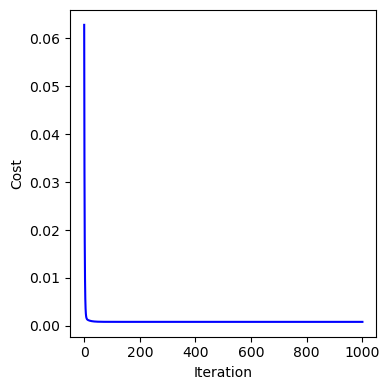

In [118]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

axs.set_xlabel("Iteration")
axs.set_ylabel("Cost")
axs.plot(list(history.keys()), list(history.values()), color="blue")

plt.tight_layout()
plt.show()

# Plot Model Per Feature

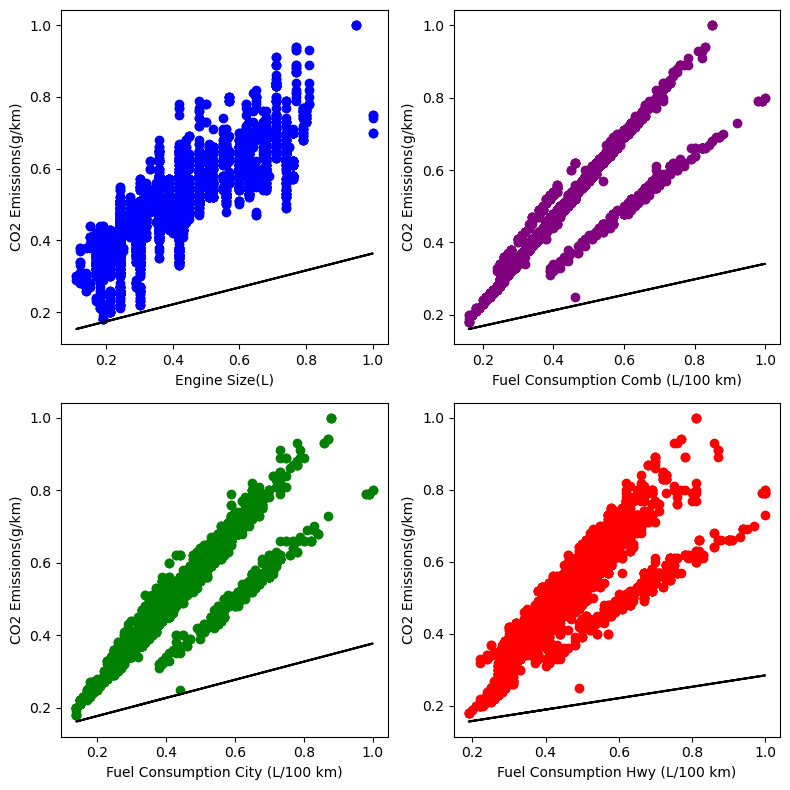

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].set_xlabel("Engine Size(L)")
axs[0, 0].set_ylabel("CO2 Emissions(g/km)")
axs[0, 0].plot(x1_normalized, y_normalized, "o", color="blue")
y_hat_1 = w_final[0] * x1_normalized + b_final
axs[0, 0].plot(x1_normalized, y_hat_1, color="black")

axs[1, 0].set_xlabel("Fuel Consumption City (L/100 km)")
axs[1, 0].set_ylabel("CO2 Emissions(g/km)")
axs[1, 0].plot(x2_normalized, y_normalized, "o", color="green")
y_hat_2 = w_final[1] * x2_normalized + b_final
axs[1, 0].plot(x2_normalized, y_hat_2, color="black")

axs[1, 1].set_xlabel("Fuel Consumption Hwy (L/100 km)")
axs[1, 1].set_ylabel("CO2 Emissions(g/km)")
axs[1, 1].plot(x3_normalized, y_normalized, "o", color="red")
y_hat_3 = w_final[2] * x3_normalized + b_final
axs[1, 1].plot(x3_normalized, y_hat_3, color="black")

axs[0, 1].set_xlabel("Fuel Consumption Comb (L/100 km)")
axs[0, 1].set_ylabel("CO2 Emissions(g/km)")
axs[0, 1].plot(x4_normalized, y_normalized, "o", color="purple")
y_hat_4 = w_final[3] * x4_normalized + b_final
axs[0, 1].plot(x4_normalized, y_hat_4, color="black")

plt.tight_layout()
plt.show()

# Accuracy

In [120]:
def accuracy(X, Y, w, b):
    sum = 0
    length = len(X)
    for i in range(length):
        model_output = round(F(X[i], w, b), 2)
        actual_output = Y[i]
        if i % 100 == 0:
            print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - (abs(model_output - actual_output) / actual_output)) * 100
    return sum/length

accuracy_final = accuracy(X_test, Y_test, w_final, b_final)
print(f"\n\n***********************\n*** Accuracy {round(accuracy_final, 2)}% ***\n***********************")

[0.21 0.27 0.34 0.3 ] -> model -> 0.36	|	actual output -> 0.35
[0.36 0.37 0.41 0.38] -> model -> 0.45	|	actual output -> 0.51
[0.32 0.41 0.45 0.42] -> model -> 0.47	|	actual output -> 0.5
[0.24 0.36 0.42 0.38] -> model -> 0.42	|	actual output -> 0.45
[0.36 0.38 0.44 0.4 ] -> model -> 0.46	|	actual output -> 0.47
[0.24 0.33 0.36 0.34] -> model -> 0.4	|	actual output -> 0.4
[0.24 0.37 0.44 0.39] -> model -> 0.43	|	actual output -> 0.46
[0.52 0.44 0.45 0.45] -> model -> 0.53	|	actual output -> 0.52
[0.63 0.45 0.49 0.47] -> model -> 0.57	|	actual output -> 0.55
[0.39 0.42 0.5  0.45] -> model -> 0.5	|	actual output -> 0.52
[0.24 0.34 0.36 0.35] -> model -> 0.4	|	actual output -> 0.4
[0.38 0.42 0.44 0.43] -> model -> 0.48	|	actual output -> 0.5
[0.42 0.25 0.41 0.3 ] -> model -> 0.42	|	actual output -> 0.35
[0.24 0.3  0.33 0.31] -> model -> 0.38	|	actual output -> 0.36
[0.24 0.42 0.47 0.44] -> model -> 0.46	|	actual output -> 0.5


***********************
*** Accuracy 94.23% ***
*************